# Notebook le Epic

## Imports

In [8]:
import numpy as np
import cv2 as cv
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

## Helper Functions

### imageLoad2Gray
coverts an image into grayscale and normalizes it

In [9]:
def imageLoad2Gray(img: np.array, dtype = np.float32) -> np.array: 
    image = np.asarray(img, dtype = dtype)
    image = rgb2gray(image)
    image /= 255.0
    return image

### img_save
show and save a ndarray as an image

In [10]:
def img_save(img_array, file_name, title= '', show = True, cmap=None, dtype = np.uint8):
    
    if show:
        plt.imshow(img_array.astype(dtype), cmap = cmap)
        plt.title(title)
        plt.show()
    
    plt.imsave(file_name, img_array.astype(dtype), cmap = cmap)

### brightness_pil

brightness of an image using Pillow

In [11]:
def brightness_pil(img, factor=0.5):
    # Convert numpy array to PIL Image
    img_pil = Image.fromarray(np.uint8(img * 255))

    # Initialize the enhancer
    enhancer = ImageEnhance.Brightness(img_pil)
    
    # Apply the enhancement
    img_output_pil = enhancer.enhance(factor)
    
    # Convert enhanced PIL image back to numpy array
    img_output = np.array(img_output_pil) / 255.0  # Normalize to [0, 1] range

    return img_output

## Step 1

Convert the image into greyscale

In [13]:
prostate = Image.open("Prostate.jpg")
gray_prostate = imageLoad2Gray(prostate)

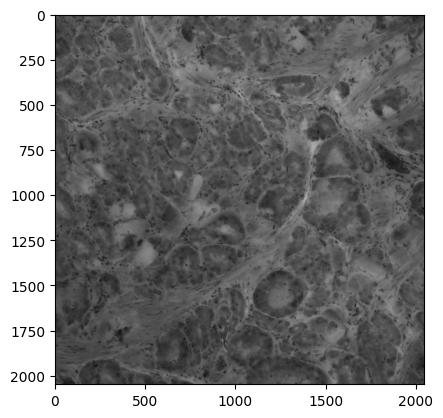

In [14]:
plt.imshow(gray_prostate, cmap="gray")

## Step 2

Play around with gaussian blur

In [15]:
blurry_prostate = gaussian_filter(gray_prostate, sigma=15)

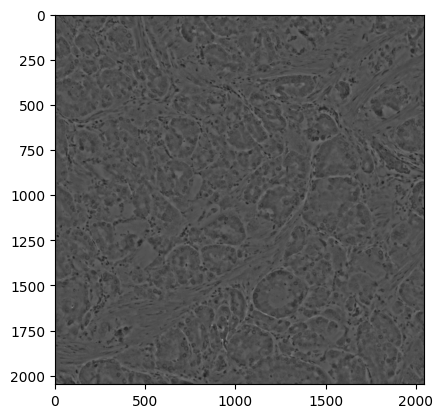

In [16]:
plt.imshow(gray_prostate/blurry_prostate, cmap="gray")
plt.imsave(arr=gray_prostate/blurry_prostate, fname= "amgojs.png", cmap="gray")

In [17]:
arrgh = gray_prostate/blurry_prostate

## Step 3

Adjust brightness

In [11]:
# Read the input image
img = cv.imread('amgojs.png', cv.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv.GaussianBlur(img, (3, 3), 0)

# Apply unsharp masking for edge enhancement
unsharp_mask = cv.addWeighted(img, 1.5, blurred, -0.5, 0)

# Apply adaptive histogram equalization for contrast enhancement
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(unsharp_mask)

# Apply additional sharpening
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv.filter2D(enhanced, -1, kernel)

# Adjust brightness and contrast
alpha = 1.2  # Contrast control
beta = 10    # Brightness control
final = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# Save the result
cv.imwrite('enhanced_image.png', final)

# Display the original and enhanced images (optional)
cv.imshow('Original', img)
cv.imshow('Enhanced', final)
cv.waitKey(0)
cv.destroyAllWindows()

In [69]:
type((gray_prostate/blurry_prostate))

numpy.ndarray

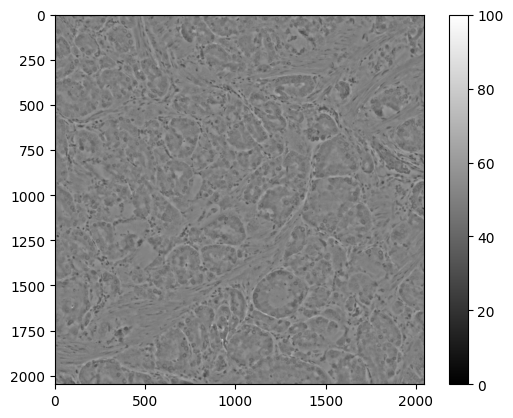

In [78]:
among = (gray_prostate / blurry_prostate) * 50
plt.imshow(among, cmap="gray", vmin=0, vmax=100)
plt.colorbar()  # Optional: Add a colorbar to show the mapping
plt.show()

In [27]:
kernal = [[1.90631489e-17, 1.05698461e-17, 8.47255538e-01], 
          [5.76969453e-01, 4.82739032e-02, 3.00407548e-03],
          [5.41839183e-02, 9.60326306e-01, 1.80031533e-01]]

new = convolve2d(arrgh, kernal)
plt.imsave(arr=new, fname="argh.jpg", cmap="gray")